 num_epochs:  10
Train Data Shape:  (53376, 1, 3000)   Test Data Shape:  (3712, 1, 3000)


There are 3088805 (3.09 million) parameters in this neural network
Epoch [1/10] , Accuracy :  34.21387889688249
Test Accuracy: 16.40625 %

Epoch [2/10] , Accuracy :  61.93420263788969
Test Accuracy: 46.363146551724135 %

Epoch [3/10] , Accuracy :  75.03747002398082
Test Accuracy: 62.203663793103445 %

Epoch [4/10] , Accuracy :  79.44956534772182
Test Accuracy: 62.3114224137931 %

Epoch [5/10] , Accuracy :  82.46964928057554
Test Accuracy: 61.341594827586206 %

Epoch [6/10] , Accuracy :  84.87897182254197
Test Accuracy: 60.7489224137931 %

Epoch [7/10] , Accuracy :  86.41149580335733
Test Accuracy: 62.95797413793104 %

Epoch [8/10] , Accuracy :  88.22504496402878
Test Accuracy: 66.27155172413794 %

Epoch [9/10] , Accuracy :  90.06669664268586
Test Accuracy: 66.51400862068965 %

Epoch [10/10] , Accuracy :  91.6910221822542
Test Accuracy: 64.52047413793103 %

train_history [34.21387889688249, 61.934

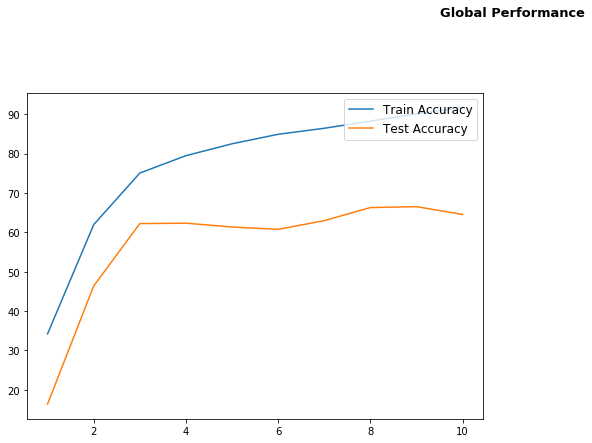

In [5]:
%matplotlib inline

%run -i 'CNN_Full.py' 

In [4]:
# def plot_one_validation_history(train_history, val_history):
#     num_epoch = len(train_history)

#     print(num_epoch)
#     plt.figure(figsize=(18, 6))
#     plt.subplot(1, 2, 1)
#     plt.plot(range(1, num_epoch + 1), train_history)
#     plt.plot(range(1, num_epoch + 1), val_history)
#     plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper right', prop={'size': 12})
#     plt.suptitle('Global Performance', fontsize=13.0, y=1.08, fontweight='bold')

    
# train_history =[53.07816247002398, 74.08011091127098, 79.10858812949641, 83.64808153477217, 86.69439448441247, 89.55523081534771, 91.04841127098321, 93.36967925659472, 94.03851918465229, 95.79398980815348]
# validation_history = [60.50646551724138, 61.341594827586206, 59.348060344827594, 58.16271551724138, 63.03879310344828, 61.449353448275865, 62.365301724137936, 65.32866379310344, 67.88793103448276, 65.40948275862068]


# plot_one_validation_history(train_history, validation_history)